In [36]:
import unittest
import os
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from unittest.mock import patch, MagicMock
from wulkany import VolcanoClassifier


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Number               2 non-null      int64 
 1   Name                 2 non-null      object
 2   Country              2 non-null      object
 3   Region               2 non-null      object
 4   Type                 2 non-null      object
 5   Last Known Eruption  2 non-null      object
dtypes: int64(1), object(5)
memory usage: 224.0+ bytes
Initial Data Info:
 None
Summary Statistics:
          Number
count  2.000000
mean   1.500000
std    0.707107
min    1.000000
25%    1.250000
50%    1.500000
75%    1.750000
max    2.000000
Creating visualizations...


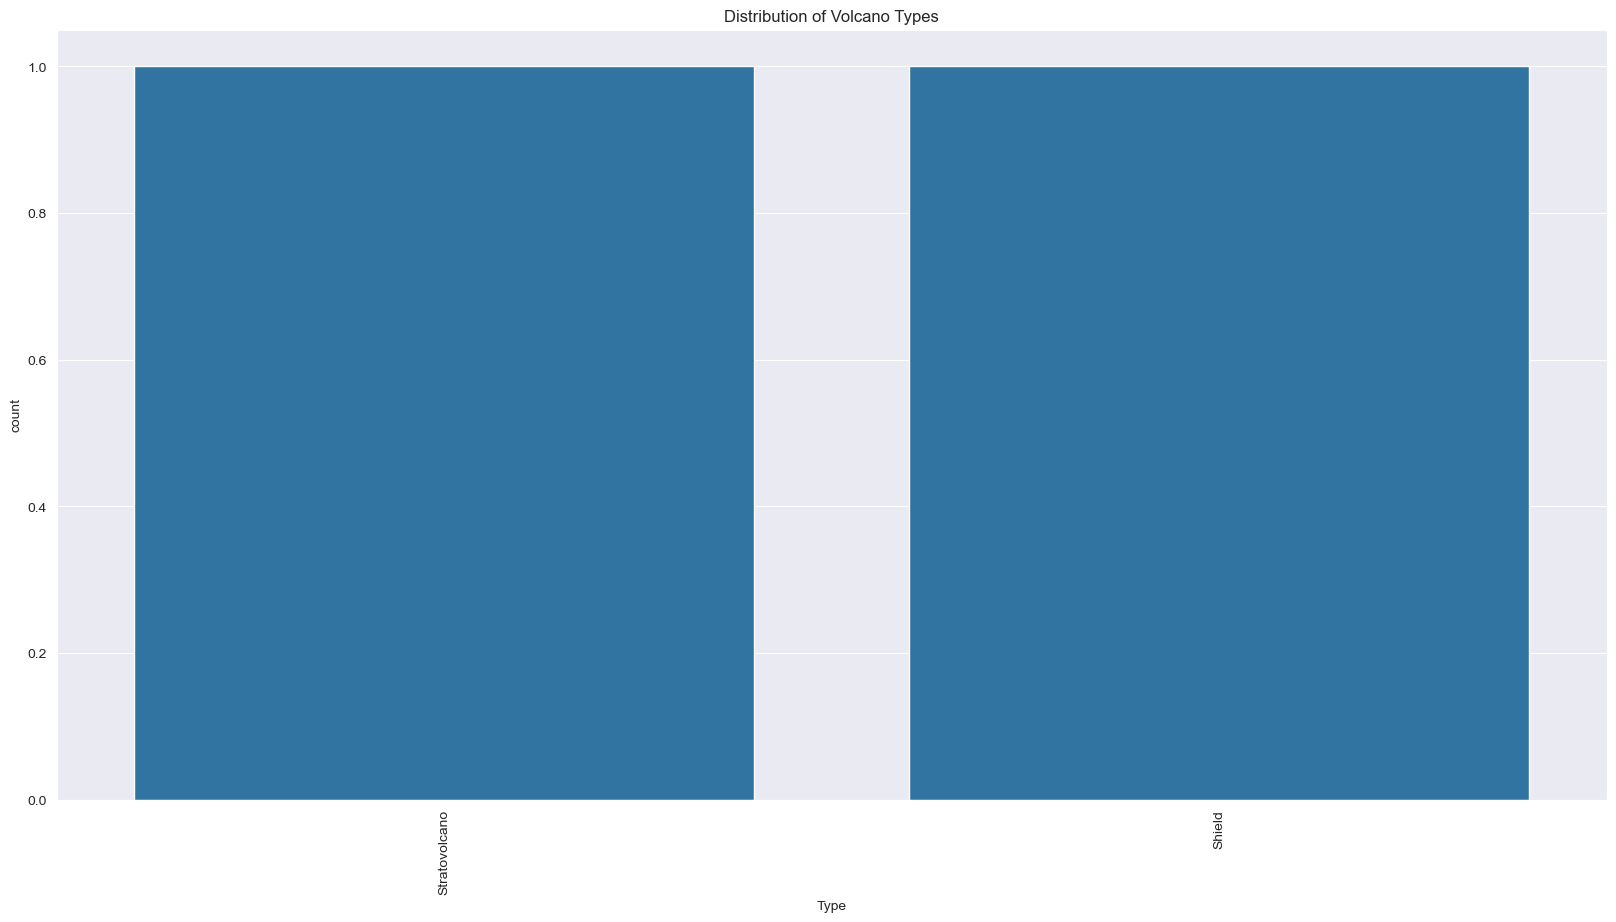

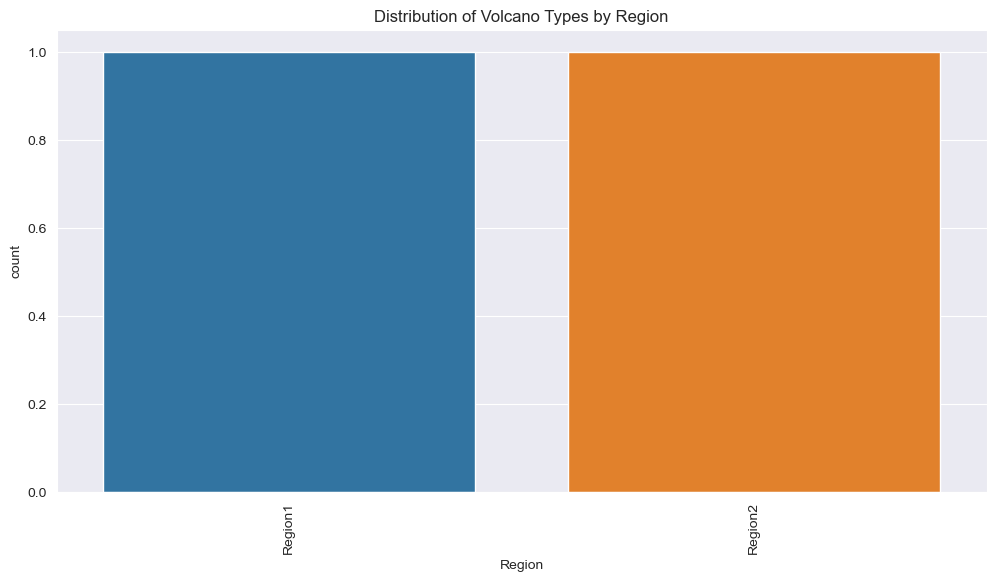

E.

Data loaded successfully.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Number               3 non-null      int64 
 1   Region               3 non-null      object
 2   Type                 2 non-null      object
 3   Last Known Eruption  2 non-null      object
dtypes: int64(1), object(3)
memory usage: 224.0+ bytes
Initial Data Info:
 None
Summary Statistics:
        Number
count     3.0
mean      2.0
std       1.0
min       1.0
25%       1.5
50%       2.0
75%       2.5
max       3.0
Creating visualizations...


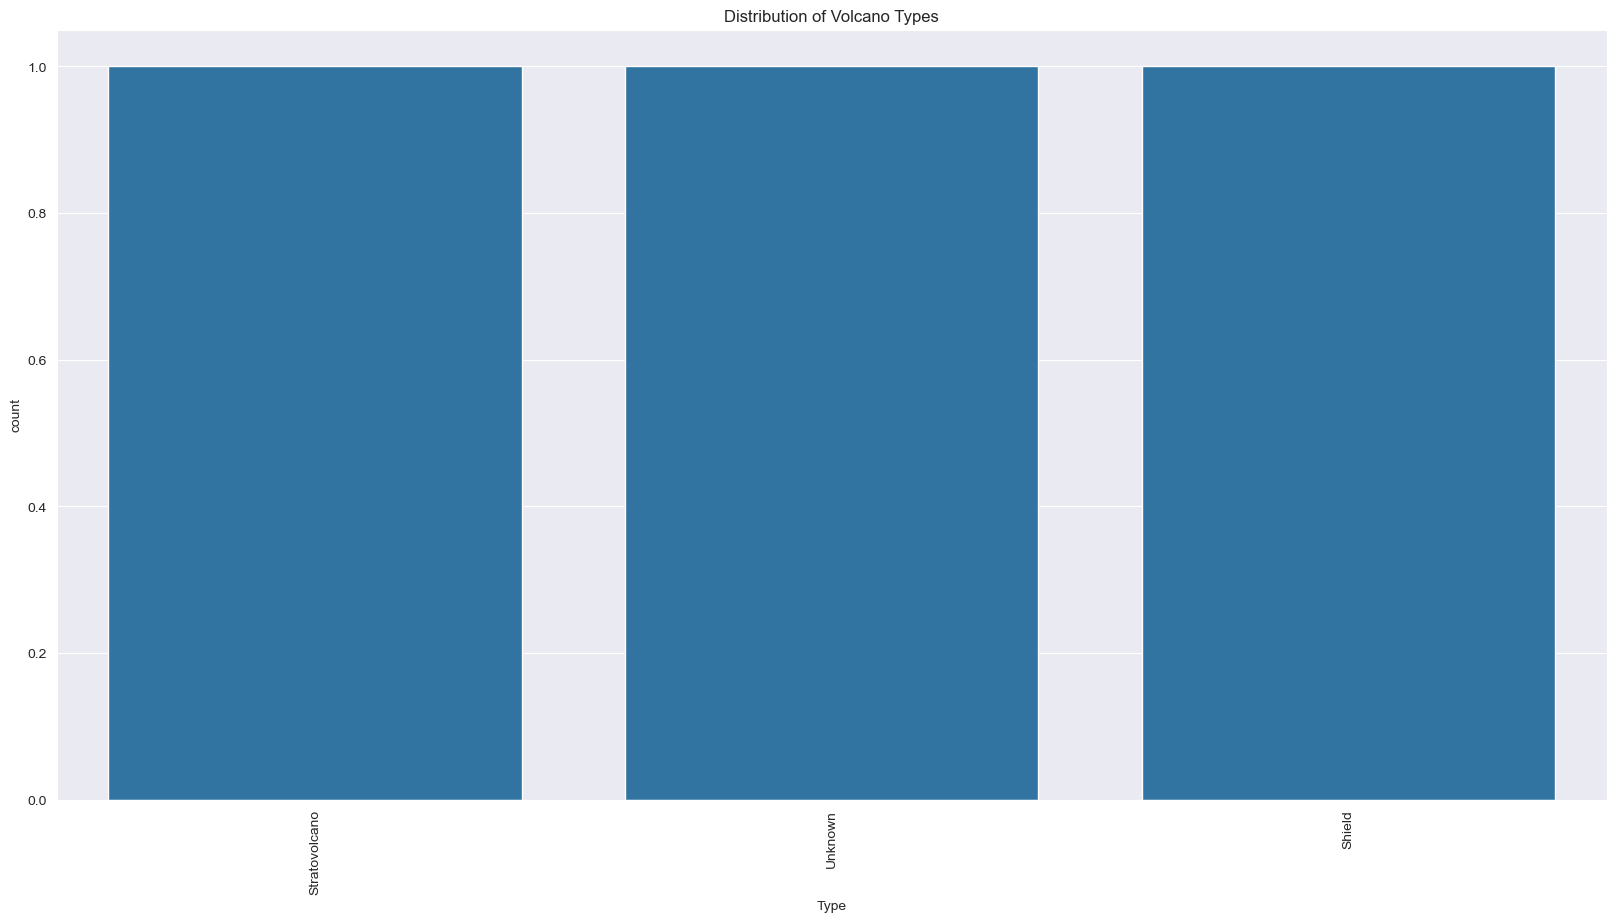

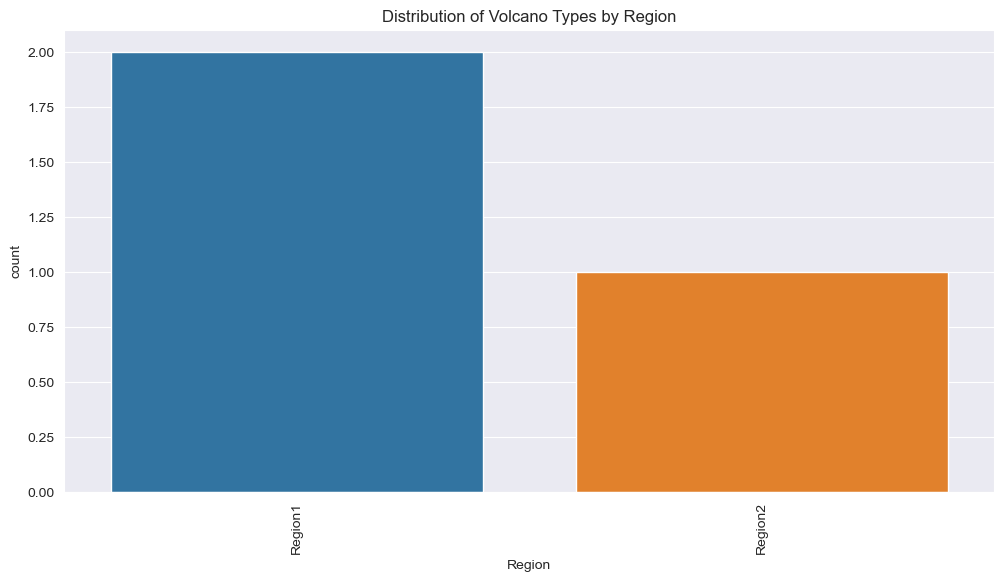

EEE
ERROR: test_invalid_column_removal (__main__.TestVolcanoClassifier)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "C:\Users\adizi\AppData\Local\Temp\ipykernel_52328\3267477977.py", line 103, in test_invalid_column_removal
    classifier.preprocess_data()
  File "C:\Users\adizi\DataspellProjects\wulkanyKoniec\wulkany.py", line 61, in preprocess_data
    data[numeric_cols] = self.scaler.fit_transform(data[numeric_cols])
  File "C:\Users\adizi\anaconda3\envs\wulkanyKoniec\lib\site-packages\sklearn\utils\_set_output.py", line 157, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "C:\Users\adizi\anaconda3\envs\wulkanyKoniec\lib\site-packages\sklearn\base.py", line 916, in fit_transform
    return self.fit(X, **fit_params).transform(X)
  File "C:\Users\adizi\anaconda3\envs\wulkanyKoniec\lib\site-packages\sklearn\preprocessing\_data.py", line 839, in fit
    return self.partial_fit(X, y, sample_weight)
  Fi

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Number               2 non-null      int64 
 1   Name                 2 non-null      object
 2   Country              2 non-null      object
 3   Region               2 non-null      object
 4   Type                 2 non-null      object
 5   Last Known Eruption  2 non-null      object
dtypes: int64(1), object(5)
memory usage: 224.0+ bytes
Initial Data Info:
 None
Summary Statistics:
          Number
count  2.000000
mean   1.500000
std    0.707107
min    1.000000
25%    1.250000
50%    1.500000
75%    1.750000
max    2.000000
Creating visualizations...


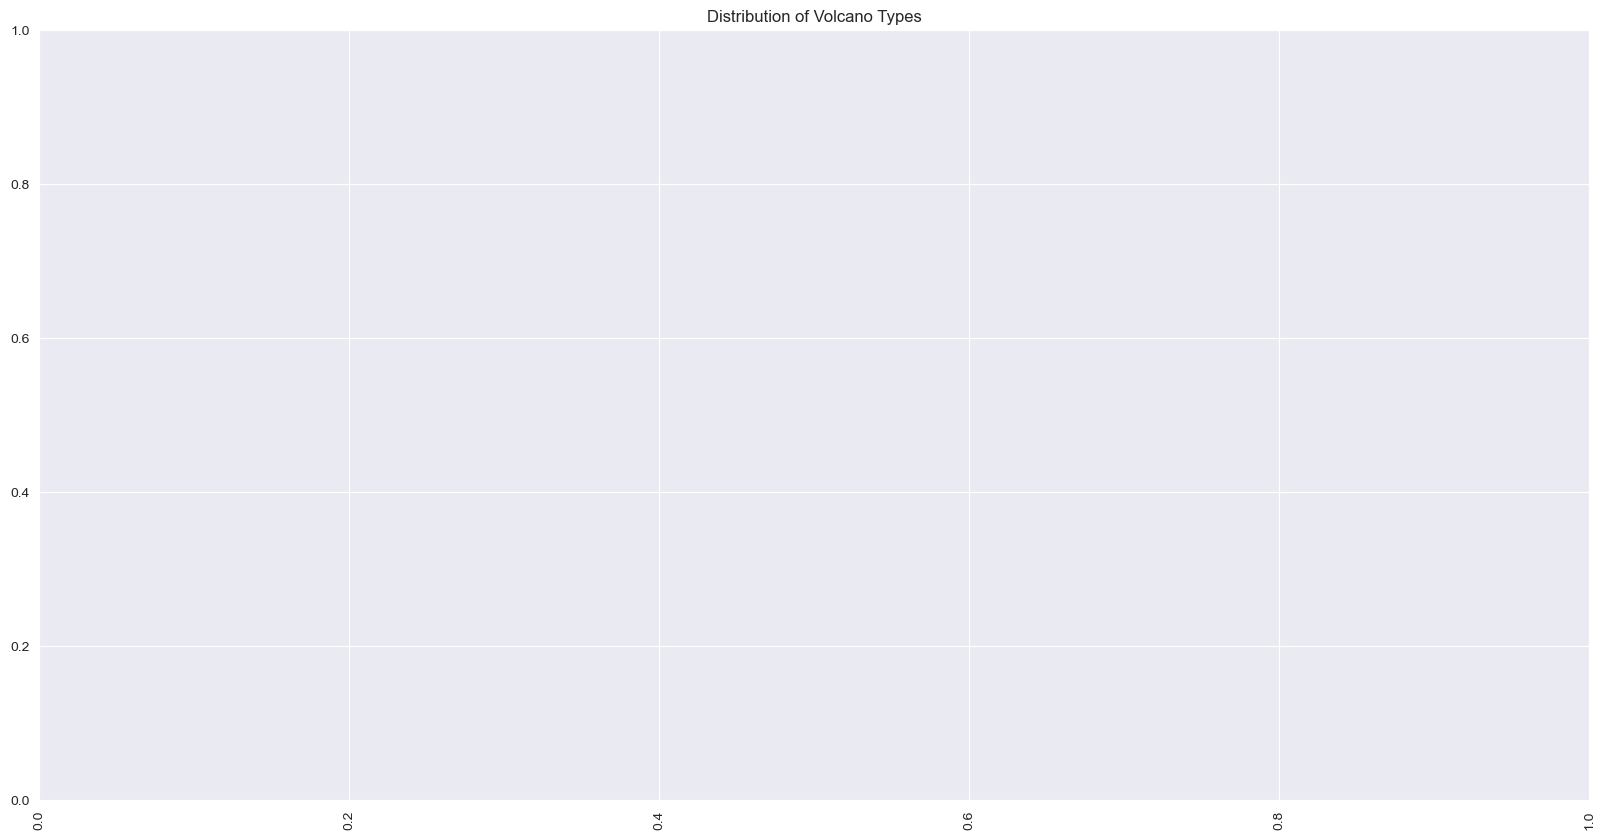

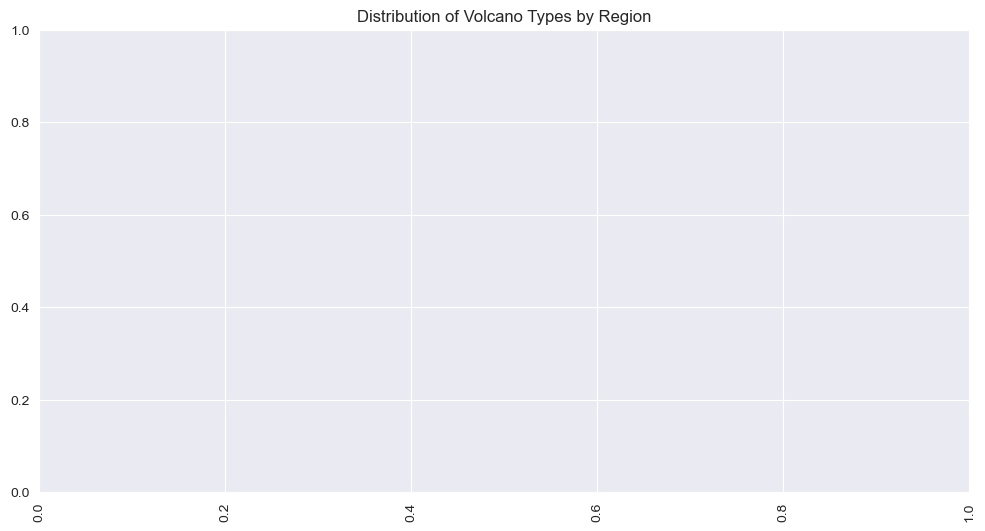

In [37]:
class TestVolcanoClassifier(unittest.TestCase):

    @patch('pandas.read_csv')
    def test_load_data(self, mock_read_csv):
        # Arrange
        mock_data = pd.DataFrame({
            'Number': [1, 2],
            'Name': ['A', 'B'],
            'Country': ['Country1', 'Country2'],
            'Region': ['Region1', 'Region2'],
            'Type': ['Stratovolcano', 'Shield'],
            'Last Known Eruption': ['2020', '2019']
        })
        mock_read_csv.return_value = mock_data
        classifier = VolcanoClassifier("fake_path.csv", "Region")

        # Act
        classifier.load_data()

        # Assert
        mock_read_csv.assert_called_once_with("fake_path.csv")
        self.assertEqual(classifier.data.shape[0], 2)  # Checking the number of rows
        self.assertIn('Region', classifier.data.columns)  # Checking if 'Region' column is present

    @patch('matplotlib.pyplot.show')
    @patch('seaborn.countplot')
    def test_preprocess_data(self, mock_countplot, mock_show):
        # Arrange
        test_data = pd.DataFrame({
            'Number': [1, 2],
            'Name': ['A', 'B'],
            'Country': ['Country1', 'Country2'],
            'Region': ['Region1', 'Region2'],
            'Type': ['Stratovolcano', 'Shield'],
            'Last Known Eruption': ['2020', '2019']
        })
        classifier = VolcanoClassifier("fake_path.csv", "Region")
        classifier.data = test_data

        # Act
        classifier.preprocess_data()

        # Assert
        # Ensure preprocessing steps happened
        self.assertTrue('Region' in classifier.data.columns)
        self.assertTrue(classifier.data['Type'].dtype == 'int64')  # Check if 'Type' is encoded

    @patch('sklearn.model_selection.GridSearchCV.fit')
    @patch('sklearn.model_selection.GridSearchCV.best_estimator_')
    def test_train_model(self, mock_best_estimator, mock_fit):
        # Arrange
        test_data = pd.DataFrame({
            'Number': [1, 2],
            'Name': ['A', 'B'],
            'Country': ['Country1', 'Country2'],
            'Region': ['Region1', 'Region2'],
            'Type': ['Stratovolcano', 'Shield'],
            'Last Known Eruption': ['2020', '2019']
        })
        classifier = VolcanoClassifier("fake_path.csv", "Region")
        classifier.data = test_data

        # Act
        classifier.train_model()

        # Assert
        mock_fit.assert_called_once()  # Ensure fit was called
        self.assertTrue(classifier.model is not None)  # Ensure the model was trained

    def test_missing_values_handling(self):
        # Arrange
        test_data = pd.DataFrame({
            'Number': [1, 2, 3],
            'Region': ['Region1', 'Region2', 'Region1'],
            'Type': ['Stratovolcano', None, 'Shield'],
            'Last Known Eruption': [None, '2019', '2020']
        })
        classifier = VolcanoClassifier("fake_path.csv", "Region")
        classifier.data = test_data

        # Act
        classifier.preprocess_data()

        # Assert
        self.assertEqual(classifier.data['Type'].isnull().sum(), 0)  # Ensure no missing values in 'Type'
        self.assertEqual(classifier.data['Last Known Eruption'].isnull().sum(),
                         0)  # Ensure no missing values in 'Last Known Eruption'

    def test_invalid_column_removal(self):
        # Arrange
        test_data = pd.DataFrame({
            'Number': [1, 2],
            'Name': ['A', 'B'],
            'Country': ['Country1', 'Country2'],
            'Region': ['Region1', 'Region2'],
            'Type': ['Stratovolcano', 'Shield'],
            'Last Known Eruption': ['2020', '2019']
        })
        classifier = VolcanoClassifier("fake_path.csv", "Region")
        classifier.data = test_data

        # Act
        classifier.preprocess_data()

        # Assert
        self.assertNotIn('Number', classifier.data.columns)  # Ensure 'Number' column was removed
        self.assertNotIn('Name', classifier.data.columns)  # Ensure 'Name' column was removed
        self.assertNotIn('Country', classifier.data.columns)  # Ensure 'Country' column was removed


if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)
